In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [16]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

train_dataset = torchvision.datasets.CIFAR10(root='Data/', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=0)
test_dataset = torchvision.datasets.CIFAR10(root='Data/', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=4, shuffle=False, num_workers=0)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


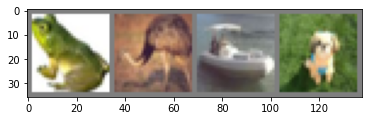

 frog  bird  ship   dog


In [17]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [18]:
import torch.nn as nn
import torch.nn.functional as F

class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
model = NN()

In [19]:
import torch.optim as optim

learning_rate = 0.01
momentum = 0.9
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)


In [20]:
epochs = 10
for epoch in range(epochs):
    
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 0:   
            print(f'Epoch No. {epoch+1}, Running Loss: {running_loss/2000}')
            running_loss = 0.0
            
    print(f'Epoch {epoch+1} completed.')
    print()

print('Trainging Completed')

Epoch No. 1, Running Loss: 0.0011574461460113524
Epoch No. 1, Running Loss: 2.097312617868185
Epoch No. 1, Running Loss: 1.989897478789091
Epoch No. 1, Running Loss: 1.9767533219456672
Epoch No. 1, Running Loss: 1.9443987654745578
Epoch No. 1, Running Loss: 1.9482279123663901
Epoch No. 1, Running Loss: 1.9608710777759553
Epoch 1 completed.

Epoch No. 2, Running Loss: 0.0009578329920768738
Epoch No. 2, Running Loss: 1.9551580565571784
Epoch No. 2, Running Loss: 2.0027318049669267
Epoch No. 2, Running Loss: 2.032703036993742
Epoch No. 2, Running Loss: 1.9931248963475228
Epoch No. 2, Running Loss: 2.023243784189224
Epoch No. 2, Running Loss: 2.025520343482494
Epoch 2 completed.

Epoch No. 3, Running Loss: 0.001040273666381836
Epoch No. 3, Running Loss: 2.061912254989147
Epoch No. 3, Running Loss: 2.1182727596759796
Epoch No. 3, Running Loss: 2.0386809588968755
Epoch No. 3, Running Loss: 2.045685466080904
Epoch No. 3, Running Loss: 2.0484310667514802
Epoch No. 3, Running Loss: 2.0508470617

In [21]:
# Saving model with trained weights
torch.save(model.state_dict(), 'Trained Models/CIFAR10_model.pth')

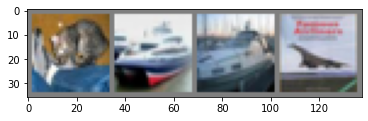

GroundTruth:    cat  ship  ship plane


In [22]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [23]:
model = NN()
model.load_state_dict(torch.load("Trained Models/CIFAR10_model.pth"))

<All keys matched successfully>

In [24]:
outputs = model(images)

_, predicted = torch.max(outputs, dim=1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:   frog plane plane plane


In [28]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total} %')

Accuracy of the network on the 10000 test images: 24.17 %


In [30]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print(f'Accuracy of {classes[i]} : {100 * class_correct[i] / class_total[i]}')

Accuracy of plane : 55.4
Accuracy of car : 58.6
Accuracy of bird : 1.9
Accuracy of cat : 0.4
Accuracy of deer : 0.0
Accuracy of dog : 13.1
Accuracy of frog : 77.1
Accuracy of horse : 30.5
Accuracy of ship : 0.1
Accuracy of truck : 4.6


In [31]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [32]:
model.to(device)
inputs, labels = data[0].to(device), data[1].to(device)